In [1]:
library(fastDummies)
library(cplm)
library(tweedie)
library(statmod)
library(HDtweedie)
library(TDboost)
library(glmnet)

Loading required package: coda

Loading required package: Matrix

Loading required package: splines

Loading required package: lattice

Loaded TDboost 1.2


Loaded glmnet 4.1-2



In [4]:
load(file="Tweedie_GLM_ALL_data_train.Rda")
load(file="Tweedie_GLM_ALL_data_test.Rda")
load(file="AutoCross_Data_train.Rda")
load(file="AutoCross_Data_test.Rda")
load(file="Tweedie_GLM_ALL_data_y_train.Rda")
load(file="Tweedie_GLM_ALL_data_y_test.Rda")

In [5]:
z0train=cbind(z0train,z0train[,'AGE']^2)
colnames(z0train)[35]='AGE2'

Use HDtweedie to screen the data.

In [6]:
group1 <- c(rep(1,5),rep(2,7),rep(3,4),4:22)
cv1 <- cv.HDtweedie(x=z0train,y=ytrain,group=group1,p=1.4,nfolds=5,pred.loss='deviance',alpha=0.5)
opt.lam=cv1$lambda.min
fit_hd<-HDtweedie(x=z0train,y=ytrain,group=group1,p=1.4,lambda = opt.lam,alpha = 0.5)
fit_hd$beta

,s0
.data_Pickup,0.000000000
.data_Sedan,0.000000000
.data_Sports Car,0.000000000
.data_SUV,0.000000000
.data_Van,0.000000000
.data_Clerical,0.000000000
.data_Doctor,0.000000000
.data_Home Maker,0.000000000
.data_Lawyer,0.000000000
.data_Manager,0.000000000


Use Profile likelihood method to determine the power parameter. Meanwhile, check whether the  power parameters in the train and test dataset are close or not.


Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"


1.2 1.3 1.4 1.5 1.6 1.7 1.8 
.......Done.


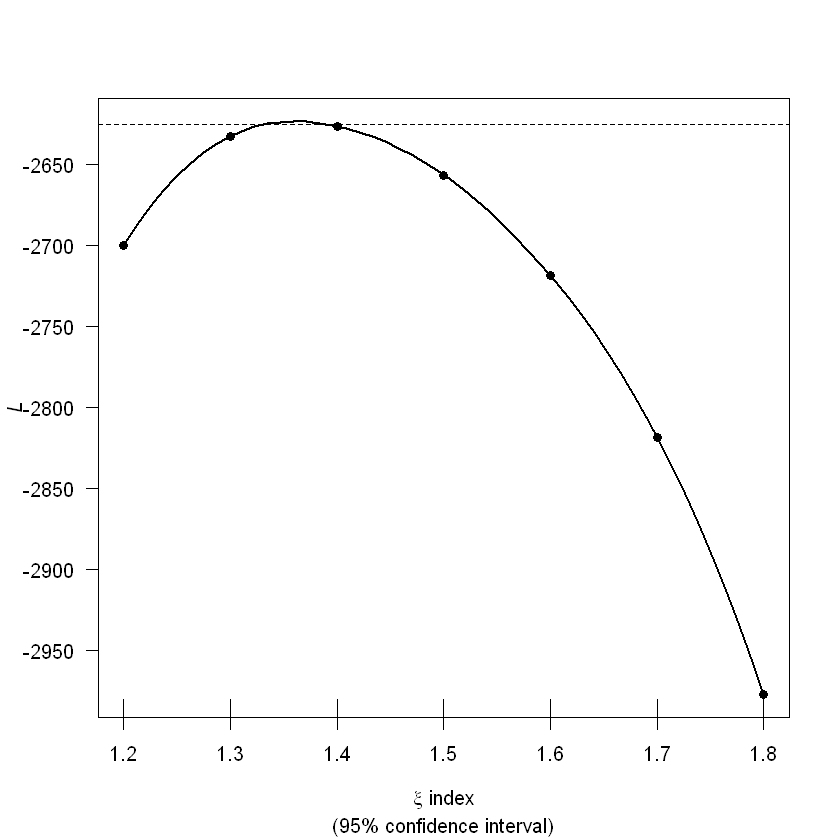

In [26]:
final_train<-as.data.frame(autocross)
final_train$y <- ytrain
final_test<-as.data.frame(autocross_test)
final_test$y <- ytest
est_p <-tweedie.profile(y~.,data=final_train
                        ,link.power = 0,do.smooth = TRUE, do.plot = TRUE)

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"


1.2 1.3 1.4 1.5 1.6 1.7 1.8 
.......Done.


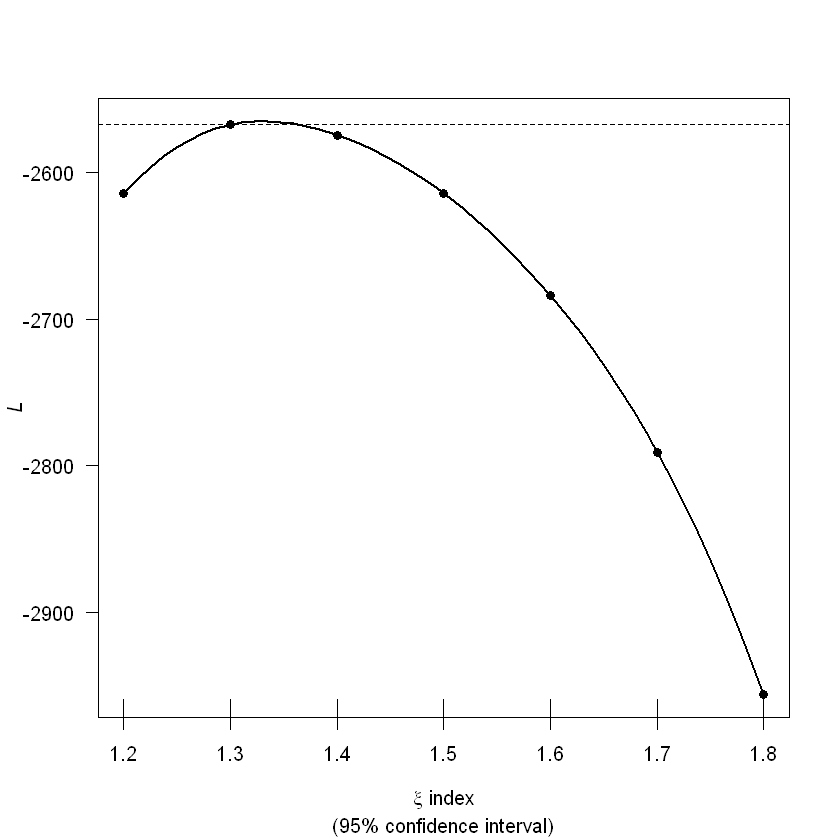

In [118]:
est_p <-tweedie.profile(y~REVOLKED+GENDER+AREA+KIDSDRIV+TRAVTIME+BLUEBOOK+MVR_PTS+AGE+INCOME+HOME_VAL,data=final_test
                        ,link.power = 0,do.smooth = TRUE, do.plot = TRUE)

Base model

In [9]:
fit1<-glm(y~REVOLKED+GENDER+AREA+KIDSDRIV+TRAVTIME+BLUEBOOK+MVR_PTS+AGE+INCOME+HOME_VAL,data=final_train
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
summary(fit1)


Call:
glm(formula = y ~ REVOLKED + GENDER + AREA + KIDSDRIV + TRAVTIME + 
    BLUEBOOK + MVR_PTS + AGE + INCOME + HOME_VAL, family = tweedie(link.power = 0, 
    var.power = 1.4), data = final_train, control = list(maxit = 500))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0635  -2.3525  -1.8652   0.2602  12.6255  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02946    0.18037  -0.163    0.870    
REVOLKED1    1.48411    0.13037  11.384  < 2e-16 ***
GENDER1     -0.16005    0.11809  -1.355    0.176    
AREA1        0.82549    0.18038   4.576 5.15e-06 ***
KIDSDRIV     0.06674    0.09951   0.671    0.503    
TRAVTIME    -0.03737    0.05845  -0.639    0.523    
BLUEBOOK    -0.05410    0.06193  -0.873    0.383    
MVR_PTS      0.18622    0.02306   8.074 1.45e-15 ***
AGE          0.04750    0.06042   0.786    0.432    
INCOME       0.03878    0.06310   0.615    0.539    
HOME_VAL    -0.07834    0.06345  -1.235    0.217    
---
S

Calculate mean deviance for training and testing dataset

In [10]:
mean(residuals(fit1,type='deviance')^2)
final_test=as.data.frame(autocross_test)
tmp_x_test <- model.matrix(~REVOLKED+GENDER+AREA+KIDSDRIV+TRAVTIME+BLUEBOOK+MVR_PTS+AGE+INCOME+HOME_VAL,data=final_test)
pred_fit1<- exp(tmp_x_test%*%fit1$coefficients)
mean(tweedie.dev(ytest,pred_fit1,1.4))

[1] 5.862258

[1] 5.466333

Subset the dataset based on selected variable by HDtweedie

In [11]:
auto_cross_new <- cbind(autocross$REVOLKED,autocross$GENDER,autocross$AREA,autocross$KIDSDRIV,autocross$TRAVTIME
                             ,autocross$BLUEBOOK,autocross$MVR_PTS,autocross$AGE,autocross$INCOME,autocross$HOME_VAL)
colnames(auto_cross_new)=c('REVOLKED','GENDER','AREA','KIDSDRIV','TRAVTIME','BLUEBOOK','MVR_PTS','AGE','INCOME','HOME_VAL')
auto_cross_new_test <- cbind(autocross_test$REVOLKED,autocross_test$GENDER,autocross_test$AREA,autocross_test$KIDSDRIV,autocross_test$TRAVTIME
                             ,autocross_test$BLUEBOOK,autocross_test$MVR_PTS,autocross_test$AGE,autocross_test$INCOME,autocross_test$HOME_VAL)
colnames(auto_cross_new_test)=c('REVOLKED','GENDER','AREA','KIDSDRIV','TRAVTIME','BLUEBOOK','MVR_PTS','AGE','INCOME','HOME_VAL')
categorical_name<- c("REVOLKED","GENDER","AREA")
auto_cross_new<-as.data.frame(auto_cross_new)
auto_cross_new_test<-as.data.frame(auto_cross_new_test)
auto_cross_new[,categorical_name]<-lapply(auto_cross_new[,categorical_name],factor)
auto_cross_new_test[,categorical_name]<-lapply(auto_cross_new_test[,categorical_name],factor)
autocross=auto_cross_new
autocross_test=auto_cross_new_test

In [12]:
summary(autocross)

Run the algorithm.

In [35]:
result_round1=matrix(nrow=dim(autocross)[2],ncol=dim(autocross)[2])
cat_coef=list()
cat_coef_names=c()
for(i in 2:(dim(autocross)[2])-1){
    for(j in (i+1):(dim(autocross)[2])){
        if (is.numeric(autocross[,i])&&is.numeric(autocross[,j])){
            tmp_x <- autocross[,i]*autocross[,j]
            tmp_fit<-glm(ytrain~tmp_x+offset(log(fitted(fit1)))
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
            result_round1[i,j]=mean(residuals(tmp_fit)^2)
        }
        else{
            tmp_x<-model.matrix(~autocross[,i]*autocross[,j])
            tmp_x<-as.matrix(tmp_x)[,-1]
            tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(fit1)),type.measure = 'deviance')
            tmp_lambda<- tmp_cvfit$lambda.min
            tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(fit1)),lambda=tmp_lambda)
            tmp_coef<-as.matrix(coef(tmp_fit))[,1]
            if (length(which(tmp_coef!=0))==0){
                result_round1[i,j]=9999}
            else{
                tmp_x<-model.matrix(~autocross[,i]*autocross[,j])
                tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(fit1)))
                result_round1[i,j]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
                cat_coef=append(cat_coef,list(as.numeric(tmp_coef)))
                cat_coef_names=c(cat_coef_names,paste(as.character(i),as.character(j),sep=''))           
            }
             names(cat_coef)=cat_coef_names
        }
  }
    }

In [36]:
round1_index <- which(result_round1 == min(result_round1,na.rm=T), arr.ind = TRUE)
colnames(autocross)[round1_index[1]]
colnames(autocross)[round1_index[2]]

[1] "BLUEBOOK"

[1] "INCOME"

In [37]:
round1_index

row,col
6,9


In [18]:
final_train<-autocross
final_train$y=ytrain

In [19]:
round1_fit<-glm(y~.+BLUEBOOK*INCOME,data=final_train
                ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
summary(round1_fit)



Call:
glm(formula = y ~ . + BLUEBOOK * INCOME, family = tweedie(link.power = 0, 
    var.power = 1.4), data = final_train, control = list(maxit = 500))

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-5.041  -2.347  -1.864   0.290  12.924  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.036112   0.180771  -0.200    0.842    
REVOLKED2        1.476675   0.130139  11.347  < 2e-16 ***
GENDER2         -0.164989   0.117786  -1.401    0.162    
AREA2            0.857831   0.180777   4.745 2.30e-06 ***
KIDSDRIV         0.072476   0.099324   0.730    0.466    
TRAVTIME        -0.039578   0.058337  -0.678    0.498    
BLUEBOOK        -0.071062   0.061779  -1.150    0.250    
MVR_PTS          0.188720   0.022932   8.229 4.27e-16 ***
AGE              0.047722   0.060504   0.789    0.430    
INCOME          -0.005702   0.065725  -0.087    0.931    
HOME_VAL        -0.067662   0.063950  -1.058    0.290    
BLUEBOOK:INCOME -0.114164   0.05

Compare AIC value

In [20]:
AICtweedie(round1_fit)
AICtweedie(fit1)

[1] 5302.097

[1] 5306.484

In [21]:
round1_test<-model.matrix(~.+BLUEBOOK*INCOME,data=autocross_test)

In [22]:
pred_round1<-exp(round1_test%*%coef(round1_fit))

In [23]:
result_round2=matrix(nrow=dim(autocross)[2],ncol=dim(autocross)[2])
cat_coef=list()
cat_coef_names=c()
for(i in 2:(dim(autocross)[2])-1){
    for(j in (i+1):(dim(autocross)[2])){
        if(i==6 &&j==9){result_round2[i,j]=999999}
        else{
            if (is.numeric(autocross[,i])&&is.numeric(autocross[,j])){
            tmp_x <- autocross[,i]*autocross[,j]
            tmp_fit<-glm(ytrain~tmp_x+offset(log(fitted(round1_fit)))
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
            result_round2[i,j]=mean(residuals(tmp_fit)^2)
        }
            else{
                tmp_x<-model.matrix(~autocross[,i]:autocross[,j])
                tmp_x<-as.matrix(tmp_x)[,-1]
                tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                     ,offset=log(fitted(round1_fit)),type.measure = 'deviance')
                tmp_lambda<- tmp_cvfit$lambda.min
                tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                     ,offset=log(fitted(round1_fit)),lambda=tmp_lambda)
                tmp_coef<-as.matrix(coef(tmp_fit))[,1][-1]
                if (length(which(tmp_coef!=0))==0){
                    result_round2[i,j]=9999}
                else{
                    tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round1_fit)))
                    result_round2[i,j]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
                    cat_coef=append(cat_coef,as.list(tmp_coef[-1]))
                    cat_coef_names=c(cat_coef_names,paste(as.character(i),as.character(j),sep=''))     
            }
    }
  }
    }
    }


In [24]:
result_round_2_threeway=rep(0,dim(autocross)[2])
cat_coef_round23=list()
cat_coef_names_round23=c()
for(i in 1:(dim(autocross)[2])){
  if (i==6 || i==9){
    result_round_2_threeway[i]=99999
  }
  else{
      tmp_x<-model.matrix(~autocross[,6]*autocross[,9]*autocross[,i])
      tmp_x<-tmp_x[,-1]
            tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round1_fit)),type.measure = 'deviance')
            tmp_lambda<- tmp_cvfit$lambda.min
            tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round1_fit)),lambda=tmp_lambda)
            tmp_coef<-as.matrix(coef(tmp_fit))[,1]
            if (length(which(tmp_coef!=0))==0){
                result_round_2_threeway[i]=9999}
            else{
                tmp_x<-model.matrix(~autocross[,6]*autocross[,9]*autocross[,i])
                tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round1_fit)))
                result_round_2_threeway[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
                cat_coef_round23=append(cat_coef_round23,list(as.numeric(tmp_coef)))
                cat_coef_names_round23=c(cat_coef_names_round23,paste(as.character(i),sep=''))       
            }  
            names(cat_coef_round23)=cat_coef_names_round23
}
    }

In [54]:
result_round2_final<-cbind(result_round2,result_round_2_threeway)

In [55]:
round2_index<-which(result_round2_final == min(result_round2_final,na.rm=T), arr.ind = TRUE)
round2_index
colnames(autocross)[round2_index[1]]
colnames(autocross)[round2_index[2]]

row,col
1,10


[1] "REVOLKED"

[1] "HOME_VAL"

In [25]:
round2_fit<-glm(y~.+BLUEBOOK*INCOME+REVOLKED*HOME_VAL,data=final_train
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
summary(round2_fit)


Call:
glm(formula = y ~ . + BLUEBOOK * INCOME + REVOLKED * HOME_VAL, 
    family = tweedie(link.power = 0, var.power = 1.4), data = final_train, 
    control = list(maxit = 500))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1836  -2.3510  -1.8642   0.3005  12.6593  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.04712    0.18044  -0.261   0.7940    
REVOLKED2           1.49311    0.12996  11.489  < 2e-16 ***
GENDER2            -0.16754    0.11734  -1.428   0.1536    
AREA2               0.86185    0.18023   4.782 1.92e-06 ***
KIDSDRIV            0.07216    0.09901   0.729   0.4662    
TRAVTIME           -0.04075    0.05816  -0.701   0.4836    
BLUEBOOK           -0.06802    0.06172  -1.102   0.2706    
MVR_PTS             0.18948    0.02281   8.305 2.33e-16 ***
AGE                 0.04590    0.06028   0.761   0.4465    
INCOME             -0.01045    0.06516  -0.160   0.8726    
HOME_VAL           -0.13227    

In [26]:
AICtweedie(round2_fit)
AICtweedie(round1_fit)

[1] 5299.932

[1] 5302.097

In [28]:
tmp_x<-model.matrix(~.+BLUEBOOK*INCOME+REVOLKED*HOME_VAL
                 ,data=autocross_test)
a<-round2_fit$coefficients
pred_round2<-exp(tmp_x%*%a)

In [29]:
mean(tweedie.dev(ytest,pred_fit1,1.4))
mean(tweedie.dev(ytest,pred_round1,1.4))
mean(tweedie.dev(ytest,pred_round2,1.4))


[1] 5.466333

[1] 5.425091

[1] 5.406137

In [121]:
train_data<-autocross
result_round3=matrix(nrow=dim(train_data)[2],ncol=dim(train_data)[2])
cat_coef=list()
cat_coef_names=c()
for(i in 2:(dim(train_data)[2])-1){
    for(j in (i+1):(dim(train_data)[2])){
        if(i==1 &&j==10||i==6&&j==9){result_round3[i,j]=999999}
        else{
            if (is.numeric(train_data[,i])&&is.numeric(train_data[,j])){
            tmp_x <- train_data[,i]*train_data[,j]
            tmp_fit<-glm(ytrain~tmp_x+offset(log(fitted(round2_fit)))
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
            result_round3[i,j]=mean(residuals(tmp_fit)^2)
        }
            else{
                tmp_x<-model.matrix(~train_data[,i]*train_data[,j])
                tmp_x<-as.matrix(tmp_x)[,-1]
                tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5 
                                     ,offset=log(fitted(round2_fit)),type.measure = 'deviance')
                tmp_lambda<- tmp_cvfit$lambda.min
                tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                     ,offset=log(fitted(round2_fit)),lambda=tmp_lambda)
                tmp_coef<-as.matrix(coef(tmp_fit))[,1]
            if (length(which(tmp_coef!=0))==0){
                result_round3[i,j]=9999}
            else{
                tmp_x<-model.matrix(~train_data[,i]*train_data[,j])
                tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round2_fit)))
                result_round3[i,j]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
                cat_coef=append(cat_coef,list(as.numeric(tmp_coef)))
                cat_coef_names=c(cat_coef_names,paste(as.character(i),as.character(j),sep=''))      
            }
            names(cat_coef)=cat_coef_names
    }
  }
    }
    }


In [70]:
result_round_3_threeway1=rep(0,dim(train_data)[2])
cat_coef_round33=list()
cat_coef_names_round33=c()
for(i in 1:(dim(train_data)[2])){
  if (i==6|| i==9){
    result_round_3_threeway1[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,6]*train_data[,9]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round2_fit)),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round2_fit)),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_3_threeway1[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,6]*train_data[,9]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round2_fit)))
          result_round_3_threeway1[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round33=append(cat_coef_round33,list(as.numeric(tmp_coef)))
          cat_coef_names_round33=c(cat_coef_names_round33,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round33)=cat_coef_names_round33
}
    }

In [72]:
result_round_3_threeway2=rep(0,dim(train_data)[2])
cat_coef_round332=list()
cat_coef_names_round332=c()
for(i in 1:(dim(train_data)[2])){
  if (i==1|| i==10){
    result_round_3_threeway2[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,1]*train_data[,10]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round2_fit)),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round2_fit)),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_3_threeway2[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,1]*train_data[,10]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round2_fit)))
          result_round_3_threeway2[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round332=append(cat_coef_round332,list(as.numeric(tmp_coef)))
          cat_coef_names_round332=c(cat_coef_names_round332,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round332)=cat_coef_names_round332
}
    }

In [73]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round2_fit)),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round2_fit)),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round2_fit)))
result_round_3_fourway<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))

In [138]:
result_round3_final<-cbind(result_round3,result_round_3_threeway1,result_round_3_threeway2)

In [123]:
min(result_round3_final,na.rm=T)
result_round_3_fourway

[1] 5.796018

[1] 5.808078

In [140]:
round3_index<-which(result_round3_final == min(result_round3_final,na.rm=T), arr.ind = TRUE)
round3_index

row,col
1,4


In [172]:
colnames(autocross)[1]
colnames(autocross)[4]
length(colnames(result_round3_final))
colnames(result_round3_final)[11]

[1] "REVOLKED"

[1] "KIDSDRIV"

[1] 12

[1] "result_round_3_threeway1"

In [173]:
tmp_x3<-model.matrix(~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL+REVOLKED*KIDSDRIV,data=train_data)
tmp_x3<-tmp_x3[,-1]

In [174]:
tmp_cvfit3<-cv.glmnet(x=tmp_x3,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,type.measure = 'deviance')
tmp_lambda<- tmp_cvfit3$lambda.min
tmp_fit3<-glmnet(x=tmp_x3,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,lambda=tmp_lambda)
tmp_coef3<-as.matrix(coef(tmp_fit3))[,1]
tmp_x3<-model.matrix(~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL+REVOLKED*KIDSDRIV,data=train_data)
fitted_fit3_lasso<-exp(tmp_x3%*%tmp_coef3)

In [205]:
den<-dtweedie(ytrain,mu=fitted_fit3_lasso,phi=sum(tweedie.dev(ytrain,fitted_fit3_lasso,1.4))/length(ytrain),power=1.4)
AIC_fit3_lasso<--2*sum( log(den))+2*(tmp_fit3$df)

In [30]:
round3_fit<-glm(y~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL+REVOLKED*KIDSDRIV,data=final_train
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))

In [31]:
summary(round3_fit)


Call:
glm(formula = y ~ . + BLUEBOOK * INCOME + MVR_PTS + REVOLKED * 
    HOME_VAL + REVOLKED * KIDSDRIV, family = tweedie(link.power = 0, 
    var.power = 1.4), data = final_train, control = list(maxit = 500))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.2913  -2.3450  -1.8590   0.2551  12.7029  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.06909    0.18155  -0.381   0.7036    
REVOLKED2           1.58922    0.13974  11.373  < 2e-16 ***
GENDER2            -0.16208    0.11764  -1.378   0.1685    
AREA2               0.85877    0.18020   4.766 2.08e-06 ***
KIDSDRIV            0.18271    0.11413   1.601   0.1096    
TRAVTIME           -0.04368    0.05828  -0.749   0.4537    
BLUEBOOK           -0.05900    0.06236  -0.946   0.3442    
MVR_PTS             0.18840    0.02288   8.236 4.06e-16 ***
AGE                 0.03943    0.06047   0.652   0.5145    
INCOME             -0.01283    0.06530  -0.196   0.8443    

In [206]:
AIC_fit3_lasso
AICtweedie(round3_fit)
AICtweedie(round2_fit)
AICtweedie(round1_fit)

[1] 5303.064

[1] 5297.277

[1] 5299.932

[1] 5302.097

In [32]:
tmp_x<-model.matrix(~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL+REVOLKED*KIDSDRIV
                 ,data=autocross_test)
a<-round3_fit$coefficients
pred_round3<-exp(tmp_x%*%a)

In [181]:
pred_round3_lasso<-exp(tmp_x%*%tmp_coef3)

In [182]:
mean(tweedie.dev(ytest,pred_fit1,1.4))
mean(tweedie.dev(ytest,pred_round1,1.4))
mean(tweedie.dev(ytest,pred_round2,1.4))
mean(tweedie.dev(ytest,pred_round3,1.4))
mean(tweedie.dev(ytest,pred_round3_lasso,1.4))

[1] 5.466333

[1] 5.425091

[1] 5.406137

[1] 5.415816

[1] 5.46794

In [184]:
da <- data.frame('y'=ytest,"P1"=pred_round3,
                 'P2'=pred_round3_lasso,"P3"=pred_fit1,'base'=rep(1,length(ytest)))
gg <- gini(loss = "y", score  = paste("P", 1:3, sep = ""), base= 'base',
           data = da)
gg


Call:
gini(loss = "y", score = paste("P", 1:3, sep = ""), base = "base", 
    data = da)

Gini indices:
      P1     P2     P3   
base  50.56  50.53  49.91

Standard errors:
      P1     P2     P3   
base  2.336  2.407  2.473

The selected score is P1.

In [146]:
result_round4=matrix(nrow=dim(train_data)[2],ncol=dim(train_data)[2])
cat_coef=list()
cat_coef_names=c()
for(i in 2:(dim(train_data)[2])-1){
    for(j in (i+1):(dim(train_data)[2])){
        if(i==1 &&j==4||i==1 &&j==10||i==6&&j==9){result_round4[i,j]=999999}
        else{
            if (is.numeric(train_data[,i])&&is.numeric(train_data[,j])){
            tmp_x <- train_data[,i]*train_data[,j]
            tmp_fit<-glm(ytrain~tmp_x+offset(log(fitted(round3_fit)))
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
            result_round4[i,j]=mean(residuals(tmp_fit)^2)
        }
            else{
                tmp_x<-model.matrix(~train_data[,i]*train_data[,j])
                tmp_x<-as.matrix(tmp_x)[,-1]
                tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5 
                                     ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
                tmp_lambda<- tmp_cvfit$lambda.min
                tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                     ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
                tmp_coef<-as.matrix(coef(tmp_fit))[,1]
            if (length(which(tmp_coef!=0))==0){
                result_round4[i,j]=9999}
            else{
                tmp_x<-model.matrix(~train_data[,i]*train_data[,j])
                tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
                result_round4[i,j]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
                cat_coef=append(cat_coef,list(as.numeric(tmp_coef)))
                cat_coef_names=c(cat_coef_names,paste(as.character(i),as.character(j),sep=''))      
            }
            names(cat_coef)=cat_coef_names
    }
  }
    }
    }


In [147]:
result_round_4_threeway1=rep(0,dim(train_data)[2])
cat_coef_round43=list()
cat_coef_names_round43=c()
for(i in 1:(dim(train_data)[2])){
  if (i==6|| i==9){
    result_round_4_threeway1[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,6]*train_data[,9]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_4_threeway1[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,6]*train_data[,9]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
          result_round_4_threeway1[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round43=append(cat_coef_round43,list(as.numeric(tmp_coef)))
          cat_coef_names_round43=c(cat_coef_names_round43,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round43)=cat_coef_names_round43
}
    }

In [148]:
result_round_4_threeway2=rep(0,dim(train_data)[2])
cat_coef_round432=list()
cat_coef_names_round432=c()
for(i in 1:(dim(train_data)[2])){
  if (i==1|| i==10){
    result_round_4_threeway2[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,1]*train_data[,10]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_4_threeway2[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,1]*train_data[,10]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
          result_round_4_threeway2[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round432=append(cat_coef_round432,list(as.numeric(tmp_coef)))
          cat_coef_names_round432=c(cat_coef_names_round432,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round432)=cat_coef_names_round432
}
    }

In [149]:
result_round_4_threeway3=rep(0,dim(train_data)[2])
cat_coef_round433=list()
cat_coef_names_round433=c()
for(i in 1:(dim(train_data)[2])){
  if (i==1|| i==4){
    result_round_4_threeway3[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_4_threeway3[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
          result_round_4_threeway3[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round433=append(cat_coef_round433,list(as.numeric(tmp_coef)))
          cat_coef_names_round433=c(cat_coef_names_round433,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round433)=cat_coef_names_round433
}
    }

In [160]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
result_round_4_fourway1<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))


In [162]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
result_round_4_fourway2<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))

In [164]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted(round3_fit)),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted(round3_fit)))
result_round_4_fiveway<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))

In [153]:
result_round4_final<-cbind(result_round4,result_round_4_threeway1,result_round_4_threeway2,result_round_4_threeway3)

In [159]:
min(result_round4_final,na.rm=T)
result_round_4_fourway1
result_round_4_fourway2
result_round_4_fiveway

[1] 5.789751

[1] 5.808018

[1] 5.808018

[1] 5.808018

In [166]:
round4_index<-which(result_round4_final == min(result_round4_final,na.rm=T), arr.ind = TRUE)
round4_index

row,col
4,12


In [168]:
colnames(autocross)[4]
length(colnames(result_round4_final))
colnames(result_round4_final)[12]

[1] "KIDSDRIV"

[1] 13

[1] "result_round_4_threeway2"

In [33]:
round4_fit<-glm(y~.+BLUEBOOK*INCOME+REVOLKED*HOME_VAL*KIDSDRIV+REVOLKED*KIDSDRIV,data=final_train
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))


In [34]:
AICtweedie(round4_fit)

[1] 5298.725

In [50]:
tmp_x4<-model.matrix(~.+BLUEBOOK*INCOME+REVOLKED*HOME_VAL*KIDSDRIV,data=train_data)
tmp_x4<-tmp_x4[,-1]

In [52]:
tmp_cvfit4<-cv.glmnet(x=tmp_x4,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,type.measure = 'deviance')
tmp_lambda<- tmp_cvfit4$lambda.min
tmp_fit4<-glmnet(x=tmp_x4,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,lambda=tmp_lambda)
tmp_coef4<-as.matrix(coef(tmp_fit4))[,1]

In [53]:
tmp_x4<-model.matrix(~.+BLUEBOOK*INCOME+REVOLKED*HOME_VAL*KIDSDRIV+REVOLKED*KIDSDRIV,data=train_data)
fitted_fit4_en<-exp(tmp_x4%*%tmp_coef4)

In [54]:
den<-dtweedie(ytrain,mu=fitted_fit4_en,phi=sum(tweedie.dev(ytrain,fitted_fit4_en,1.4))/length(ytrain),power=1.4)
AIC_fit4_en<--2*sum( log(den))+2*(tmp_fit4$df)

In [55]:
AIC_fit4_en
AICtweedie(round4_fit)

[1] 5293.894

[1] 5298.725

In [248]:
AIC_fit4_en
AICtweedie(round4_fit)
AICtweedie(round3_fit)
AICtweedie(round2_fit)
AICtweedie(round1_fit)

[1] 5293.406

[1] 5295.046

[1] 5297.277

[1] 5299.932

[1] 5302.097

In [56]:
tmp_x<-model.matrix(~.+BLUEBOOK*INCOME+REVOLKED*HOME_VAL*KIDSDRIV+REVOLKED*KIDSDRIV
                 ,data=autocross_test)
a<-round4_fit$coefficients
pred_round4<-exp(tmp_x%*%a)
pred_round4_en<-exp(tmp_x%*%tmp_coef4)

In [ ]:
mean(tweedie.dev(ytest,pred_fit1,1.4))
mean(tweedie.dev(ytest,pred_round1,1.4))
mean(tweedie.dev(ytest,pred_round2,1.4))
mean(tweedie.dev(ytest,pred_round3,1.4))
mean(tweedie.dev(ytest,pred_round4,1.4))
mean(tweedie.dev(ytest,pred_round4_en,1.4))

In [256]:
da <- data.frame('y'=ytest,"P1"=pred_round4,
                 'P2'=pred_round4_en,'P3'=pred_round3,'P4'=pred_round2,'P5'=pred_round1,"P6"=pred_fit1,'base'=rep(1,length(ytest)))
gg <- gini(loss = "y", score  = paste("P", 1:6,sep = ""), base= 'base',
           data = da)
gg


Call:
gini(loss = "y", score = paste("P", 1:6, sep = ""), base = "base", 
    data = da)

Gini indices:
      P1     P2     P3     P4     P5     P6   
base  50.32  50.62  50.56  50.78  50.46  49.91

Standard errors:
      P1     P2     P3     P4     P5     P6   
base  2.334  2.351  2.336  2.334  2.344  2.473

The selected score is P4.

In [72]:
da <- data.frame('y'=ytest,"P1"=pred_round4_en,
                 'P2'=pred_fit1,'P3'=pred_basefit,'base'=rep(1,length(ytest)))
gg <- gini(loss = "y", score  = paste("P", 1:3,sep = ""), base= 'base',
           data = da)
gg


Call:
gini(loss = "y", score = paste("P", 1:3, sep = ""), base = "base", 
    data = da)

Gini indices:
      P1     P2     P3   
base  50.64  49.91  50.19

Standard errors:
      P1     P2     P3   
base  2.354  2.473  2.352

The selected score is P1.

In [257]:
result_round5=matrix(nrow=dim(train_data)[2],ncol=dim(train_data)[2])
cat_coef=list()
cat_coef_names=c()
for(i in 2:(dim(train_data)[2])-1){
    for(j in (i+1):(dim(train_data)[2])){
        if(i==1 &&j==4||i==1 &&j==10||i==6&&j==9){result_round4[i,j]=999999}
        else{
            if (is.numeric(train_data[,i])&&is.numeric(train_data[,j])){
            tmp_x <- train_data[,i]*train_data[,j]
            tmp_fit<-glm(ytrain~tmp_x+offset(log(fitted_fit4_en))
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
            result_round5[i,j]=mean(residuals(tmp_fit)^2)
        }
            else{
                tmp_x<-model.matrix(~train_data[,i]*train_data[,j])
                tmp_x<-as.matrix(tmp_x)[,-1]
                tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5 
                                     ,offset=log(fitted_fit4_en),type.measure = 'deviance')
                tmp_lambda<- tmp_cvfit$lambda.min
                tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                     ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
                tmp_coef<-as.matrix(coef(tmp_fit))[,1]
            if (length(which(tmp_coef!=0))==0){
                result_round5[i,j]=9999}
            else{
                tmp_x<-model.matrix(~train_data[,i]*train_data[,j])
                tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
                result_round5[i,j]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
                cat_coef=append(cat_coef,list(as.numeric(tmp_coef)))
                cat_coef_names=c(cat_coef_names,paste(as.character(i),as.character(j),sep=''))      
            }
            names(cat_coef)=cat_coef_names
    }
  }
    }
    }

In [219]:
result_round_5_threeway1=rep(0,dim(train_data)[2])
cat_coef_round43=list()
cat_coef_names_round43=c()
for(i in 1:(dim(train_data)[2])){
  if (i==6|| i==9){
    result_round_5_threeway1[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,6]*train_data[,9]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_5_threeway1[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,6]*train_data[,9]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
          result_round_5_threeway1[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round43=append(cat_coef_round43,list(as.numeric(tmp_coef)))
          cat_coef_names_round43=c(cat_coef_names_round43,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round43)=cat_coef_names_round43
}
    }

In [220]:
result_round_5_threeway2=rep(0,dim(train_data)[2])
cat_coef_round432=list()
cat_coef_names_round432=c()
for(i in 1:(dim(train_data)[2])){
  if (i==1|| i==10){
    result_round_5_threeway2[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,1]*train_data[,10]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_5_threeway2[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,1]*train_data[,10]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
          result_round_5_threeway2[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round432=append(cat_coef_round432,list(as.numeric(tmp_coef)))
          cat_coef_names_round432=c(cat_coef_names_round432,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round432)=cat_coef_names_round432
}
    }

In [221]:
result_round_5_threeway3=rep(0,dim(train_data)[2])
cat_coef_round433=list()
cat_coef_names_round433=c()
for(i in 1:(dim(train_data)[2])){
  if (i==1|| i==4){
    result_round_5_threeway3[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_5_threeway3[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
          result_round_5_threeway3[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round433=append(cat_coef_round433,list(as.numeric(tmp_coef)))
          cat_coef_names_round433=c(cat_coef_names_round433,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round433)=cat_coef_names_round433
}
    }

In [223]:
result_round_5_fourway1=rep(0,dim(train_data)[2])
cat_coef_round43=list()
cat_coef_names_round43=c()
for(i in 1:(dim(train_data)[2])){
  if (i==1|| i==4||i==10){
    result_round_5_fourway1[i]=99999
  }
  else{
      tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,10]*train_data[,i])
      tmp_x<-tmp_x[,-1]
      tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
      tmp_lambda<- tmp_cvfit$lambda.min
      tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
      tmp_coef<-as.matrix(coef(tmp_fit))[,1]
      if (length(which(tmp_coef!=0))==0){
        result_round_5_fourway1[i]=9999}
      else{
          tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,10]*train_data[,i])
          tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
          result_round_5_fourway1[i]<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))
          cat_coef_round43=append(cat_coef_round43,list(as.numeric(tmp_coef)))
          cat_coef_names_round43=c(cat_coef_names_round43,paste(as.character(i),sep=''))       
            }  
      names(cat_coef_round43)=cat_coef_names_round43
}
    }

In [224]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
result_round_5_fourway2<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))


In [225]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
result_round_5_fourway3<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))

In [226]:
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_x<-tmp_x[,-1]
tmp_cvfit<-cv.glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),type.measure = 'deviance')
tmp_lambda<- tmp_cvfit$lambda.min
tmp_fit<-glmnet(x=tmp_x,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,offset=log(fitted_fit4_en),lambda=tmp_lambda)
tmp_coef<-as.matrix(coef(tmp_fit))[,1]
tmp_x<-model.matrix(~train_data[,1]*train_data[,4]*train_data[,6]*train_data[,9]*train_data[,10])
tmp_fitted<-exp(tmp_x%*%tmp_coef+log(fitted_fit4_en))
result_round_5_fiveway<-mean(tweedie.dev(ytrain,tmp_fitted,1.4))

In [227]:
result_round5_final<-cbind(result_round5,result_round_5_threeway1,result_round_5_threeway2,result_round_5_threeway3,result_round_5_fourway1)

In [228]:
min(result_round5_final,na.rm=T)
result_round_5_fourway2
result_round_5_fourway3
result_round_5_fiveway

[1] 5.753044

[1] 5.784898

[1] 5.780852

[1] 5.784898

In [229]:
round5_index<-which(result_round5_final == min(result_round5_final,na.rm=T), arr.ind = TRUE)
round5_index

row,col
3,10


In [231]:
colnames(autocross)[3]
colnames(autocross)[10]

[1] "AREA"

[1] "HOME_VAL"

In [37]:
round5_fit<-glm(y~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL*KIDSDRIV+REVOLKED*KIDSDRIV+AREA*HOME_VAL,data=final_train
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))

In [38]:
AICtweedie(round5_fit)

[1] 5295.046

In [236]:
tmp_x5<-model.matrix(~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL*KIDSDRIV+REVOLKED*KIDSDRIV+AREA*HOME_VAL,data=train_data)
tmp_x5<-tmp_x5[,-1]

In [237]:
tmp_cvfit5<-cv.glmnet(x=tmp_x5,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,type.measure = 'deviance')
tmp_lambda<- tmp_cvfit5$lambda.min
tmp_fit5<-glmnet(x=tmp_x5,y=ytrain,family=tweedie(link.power=0,var.power=1.4),alpha=0.5
                                 ,lambda=tmp_lambda)
tmp_coef5<-as.matrix(coef(tmp_fit5))[,1]

In [238]:
tmp_coef5

(Intercept)                   REVOLKED2 
                0.123806194                 1.459896158 
                    GENDER2                       AREA2 
               -0.092434097                 0.697650222 
                   KIDSDRIV                    TRAVTIME 
                0.046559349                -0.007001883 
                   BLUEBOOK                     MVR_PTS 
               -0.026645396                 0.174252181 
                        AGE                      INCOME 
                0.000000000                 0.000000000 
                   HOME_VAL             BLUEBOOK:INCOME 
               -0.057530941                -0.065762747 
         REVOLKED2:HOME_VAL          REVOLKED2:KIDSDRIV 
                0.067157985                -0.180990378 
          KIDSDRIV:HOME_VAL              AREA2:HOME_VAL 
                0.000000000                 0.000000000 
REVOLKED2:KIDSDRIV:HOME_VAL 
                0.119475518

In [239]:
tmp_x5<-model.matrix(~.+BLUEBOOK*INCOME+MVR_PTS+REVOLKED*HOME_VAL*KIDSDRIV+REVOLKED*KIDSDRIV+AREA*HOME_VAL,data=train_data)
fitted_fit5_en<-exp(tmp_x5%*%tmp_coef5)

In [244]:
den<-dtweedie(ytrain,mu=fitted_fit5_en,phi=sum(tweedie.dev(ytrain,fitted_fit5_en,1.4))/length(ytrain),power=1.4)
AIC_fit5_en<--2*sum( log(den))+2*(tmp_fit5$df)

In [245]:
AIC_fit5_en
AICtweedie(round5_fit)
AIC_fit4_en
AICtweedie(round3_fit)
AICtweedie(round2_fit)
AICtweedie(round1_fit)

[1] 5299.146

[1] 5295.046

[1] 5293.406

[1] 5297.277

[1] 5299.932

[1] 5302.097

Thus, the algorithm stopped and we use the results from round 4 as our final model.

[1] 5.565981

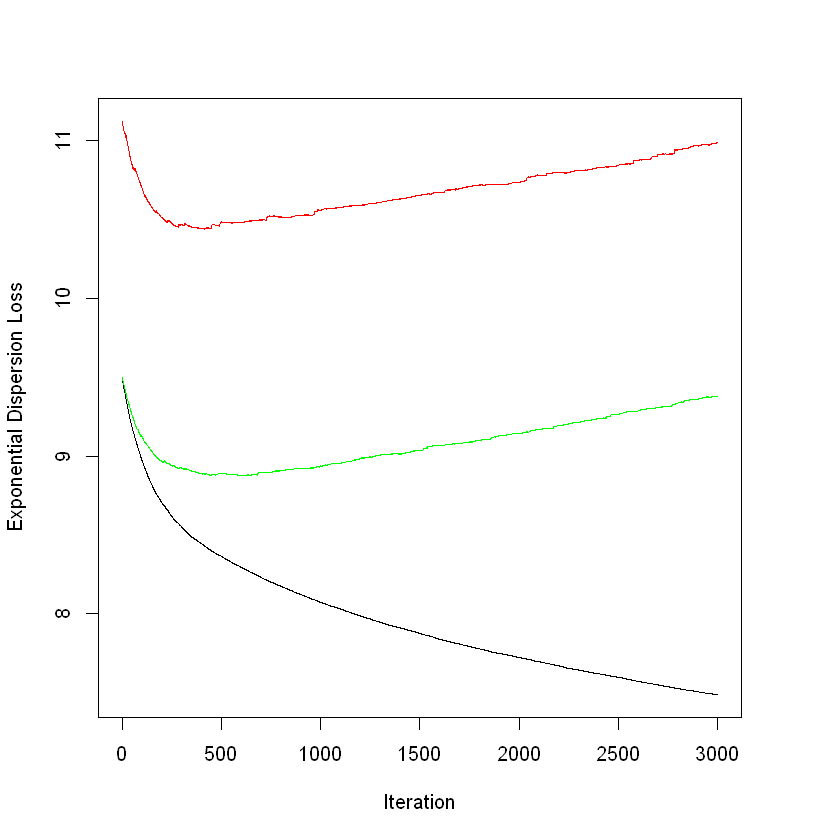

In [81]:
library(TDboost)
TDboost1 <-TDboost(y~REVOLKED+GENDER+AREA+KIDSDRIV+TRAVTIME+BLUEBOOK+MVR_PTS+AGE+INCOME+HOME_VAL,data=final_train,
                   var.monotone=c(0,0,0,0,0,0,0,0,0,0), distribution=list(name="EDM",alpha=1.4)
                   , n.trees=3000, shrinkage=0.005, interaction.depth=5, bag.fraction = 0.5, 
                   train.fraction = 0.75, n.minobsinnode = 10, cv.folds = 5, keep.data=TRUE, verbose=FALSE)
best.iter <-TDboost.perf(TDboost1,method="cv")
fit_td<-predict(TDboost1,final_train,n.trees=best.iter,type='response')
mean(tweedie.dev(ytrain,fit_td,1.4))

In [82]:
predict_td<-predict(TDboost1,autocross_test,n.trees=best.iter,type='response')
mean(tweedie.dev(ytest,predict_td,1.4))

[1] 5.660066

In [83]:
da <- data.frame('y'=ytest,"P1"=pred_round4,
                 'P2'=pred_round4_en,'P3'=predict_td,"P4"=pred_fit1,'base'=rep(1,length(ytest)))
gg <- gini(loss = "y", score  = paste("P", 1:4,sep = ""), base= 'base',
           data = da)
gg


Call:
gini(loss = "y", score = paste("P", 1:4, sep = ""), base = "base", 
    data = da)

Gini indices:
      P1     P2     P3     P4   
base  50.32  50.57  47.83  49.91

Standard errors:
      P1     P2     P3     P4   
base  2.334  2.348  2.378  2.473

The selected score is P2.

1 
2 
3 
4 
5 
6 
7 
8 
9 




$rank.list
  var1.index var1.names var2.index var2.names int.size
1          5   TRAVTIME          1   REVOLKED    33.44
2          3       AREA          1   REVOLKED    25.34
3          6   BLUEBOOK          1   REVOLKED    11.99
4          7    MVR_PTS          3       AREA     6.10
5          8        AGE          1   REVOLKED     5.96

$interactions
         REVOLKED GENDER  AREA KIDSDRIV TRAVTIME BLUEBOOK MVR_PTS  AGE INCOME
REVOLKED        0   0.05 25.34     0.14    33.44    11.99    5.70 5.96   1.27
GENDER          0   0.00  0.00     0.00     0.00     0.00    0.00 0.00   0.00
AREA            0   0.00  0.00     0.01     0.08     0.00    6.10 0.00   0.06
KIDSDRIV        0   0.00  0.00     0.00     0.01     0.00    0.01 0.00   0.00
TRAVTIME        0   0.00  0.00     0.00     0.00     0.06    0.19 0.03   0.07
BLUEBOOK        0   0.00  0.00     0.00     0.00     0.00    0.04 0.00   0.04
MVR_PTS         0   0.00  0.00     0.00     0.00     0.00    0.00 0.00   0.82
AGE             0   0.00  0.00     0.00     0.00     0.00    0.00 0.00   0.00
INCOME          0   0.00  0.00     0.00     0.00     0.00    0.00 0.00   0.00
HOME_VAL        0   0.00  0.00     0.00     0.00     0.00    0.00 0.00   0.00
         HOME_VAL
REVOLKED     2.07
GENDER       0.00
AREA         0.04
KIDSDRIV     0.00
TRAVTIME     0.03
BLUEBOOK     0.30
MVR_PTS      0.35
AGE          0.00
INCOME       0.00
HOME_VAL     0.00

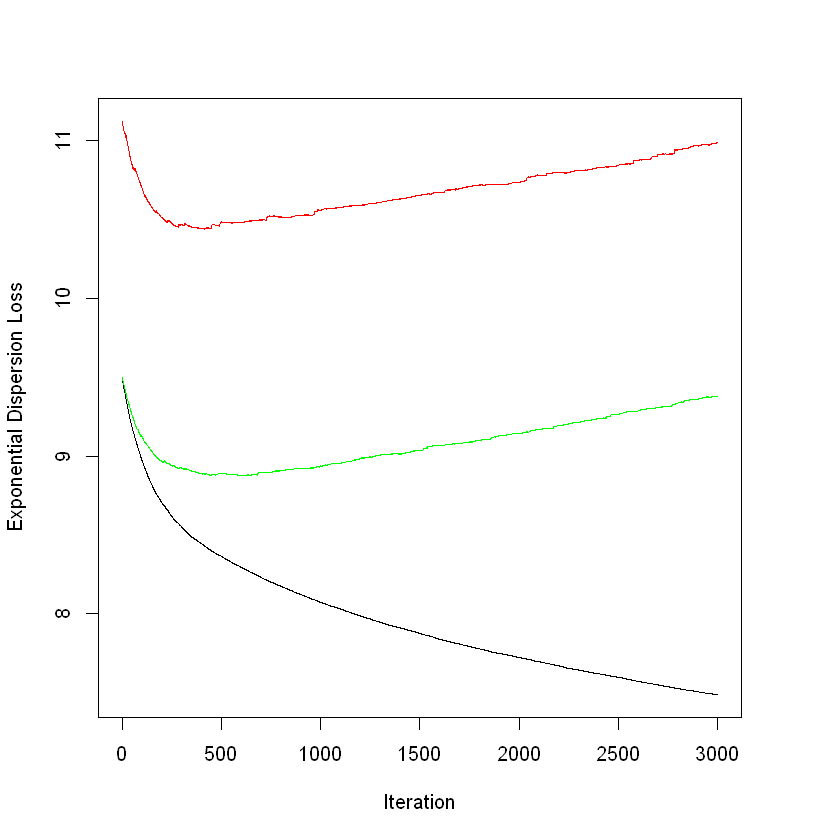

In [95]:
source("td-glm-interaction.R")
tdglm.interaction(TDboost1,data=final_train,p.parameter=1.4)

In [42]:
round6_fit<-glm(y~.+REVOLKED*TRAVTIME+REVOLKED*BLUEBOOK,data=final_train
                   ,family=tweedie(link.power=0,var.power=1.4),control=list(maxit=500))
summary(round6_fit)


Call:
glm(formula = y ~ . + REVOLKED * TRAVTIME + REVOLKED * BLUEBOOK, 
    family = tweedie(link.power = 0, var.power = 1.4), data = final_train, 
    control = list(maxit = 500))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1562  -2.3477  -1.8687   0.2697  12.6565  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.03262    0.18066  -0.181    0.857    
REVOLKED2           1.48810    0.13077  11.379  < 2e-16 ***
GENDER2            -0.15747    0.11859  -1.328    0.184    
AREA2               0.82575    0.18103   4.561 5.53e-06 ***
KIDSDRIV            0.06486    0.09983   0.650    0.516    
TRAVTIME           -0.04513    0.06902  -0.654    0.513    
BLUEBOOK           -0.06567    0.06991  -0.939    0.348    
MVR_PTS             0.18698    0.02319   8.064 1.58e-15 ***
AGE                 0.04765    0.06056   0.787    0.432    
INCOME              0.03806    0.06321   0.602    0.547    
HOME_VAL           -0.07821  

In [38]:
AICtweedie(round6_fit)

[1] 5310.266

In [39]:
tmp_x6<-model.matrix(~.+REVOLKED*TRAVTIME+REVOLKED*BLUEBOOK,data=autocross_test)
pred_fit6<-exp(tmp_x6%*%round6_fit$coefficients)

In [41]:
da <- data.frame('y'=ytest,"P1"=pred_fit1,
                 'P2'=pred_fit6,'base'=rep(1,length(ytest)))
gg <- gini(loss = "y", score  = paste("P", 1:2,sep = ""), base= 'base',
           data = da)
gg


Call:
gini(loss = "y", score = paste("P", 1:2, sep = ""), base = "base", 
    data = da)

Gini indices:
      P1     P2   
base  49.91  49.92

Standard errors:
      P1     P2   
base  2.473  2.481

The selected score is P2.